Who doesn't like a coin flipping puzzle? Certainly not a statistics major. This week's [Riddler Classic](https://fivethirtyeight.com/features/i-would-walk-500-miles-and-i-would-riddle-500-more/) from FiveThirtyEight features a logic puzzle, supposedly asked as an interview question at a bank. This writeup details my approach to the problem.

Here is the problem statement:

> There is a square table with a quarter on each corner. The table is behind a curtain and thus out of your view. Your goal is to get all of the quarters to be heads up — if at any time all of the quarters are heads up, you will immediately be told and win.

> The only way you can affect the quarters is to tell the person behind the curtain to flip over as many quarters as you would like and in the corners you specify. (For example, "Flip over the top left quarter and bottom right quarter," or, "Flip over all of the quarters.") Flipping over a quarter will always change it from heads to tails or tails to heads. However, after each command, the table is spun randomly to a new orientation (that you don't know), and you must give another instruction before it is spun again.

> Can you find a series of steps that guarantees you will have all of the quarters heads up in a finite number of moves?

## Observations

What makes this difficult is the fact that the table rotates to a random orientation after each turn. Therefore, the specific quarters (top left, bottom right, etc) that you decide to flip on each turn don't matter, rather how many and their orientation with respect to each other is what matters.


To solve this problem, my approach was to break it down into cases and build up the full strategy by combining subroutines that solve these specific cases. Ignoring rotation permutations, here are the four basic initial starting orientations. After a random rotation, a table will stay in whatever case it started in.

$$
\text{Case 1}: \begin{pmatrix} 
H & H \\
H & H 
\end{pmatrix}
\
\begin{pmatrix} 
T & T \\
T & T 
\end{pmatrix}
\\
\text{Case 2}: \begin{pmatrix} 
H & T \\
T & H 
\end{pmatrix}
\\
\text{Case 3}: \begin{pmatrix} 
H & H \\
T & T 
\end{pmatrix}
\\
\text{Case 4}: \begin{pmatrix} 
H & H \\
H & T 
\end{pmatrix}
\
\begin{pmatrix} 
T & T \\
T & H 
\end{pmatrix}
$$

In the discussion that follows, I will specify moves as follows to describe my strategy.

1. **All:** Flip over all quarters. Note that after this move, the table will still be within the same case described above.
2. **Adj:** Flip any two adjacent quarters.
3. **Diag:** Flip any two quarters diagonally across from each other.
4. **One:** Flip any one quarter.

First, consider Case 1 which is the trivial case where all the quarters are either heads or tails. You either instantly win or win in one move with **All**.

Second, consider Case 2. Using **Diag**, we are guaranteed to end up in Case 1 which we know how to solve.

Third, consider what happens when using **Diag** in Case 3. We end up right where we started with the heads adjacent to each other. If we then use **Adj**, we end up in either Case 1 or Case 2, both of which we know how to solve.

At this point, we have a strategy for solving all but Case 4.

1. **All** (Guaranteed to solve Case 1 by this move)
2. **Diag**
3. **All** (Guaranteed to solve Case 2 by this move)
4. **Adj**
5. **All**
6. **Diag**
7. **All** (Guaranteed to solve Case 3 by this move)

Now all that's left is to solve Case 4, where we start with three of either heads or tails and one of the other. What happens when we perform the above set of moves on this orientation? Note that any **All** move leaves you in the same case that you started, so our move sequence is effectively **Diag**, **Adj**, and **Diag**. The **Diag** move either flips one of each side or two of the same side. Either way, we stay in Case 4. The same holds true for the remaining **Adj** and **Diag** moves, so we are guaranteed to still be in Case 4 after this sequence.

If we use **One** while in Case 4, we end up in one of Cases 1 - 3. Since we know that the above subroutine solves all of those cases, repeating it gives us a complete strategy!

## Full Strategy

1. **All** (Guaranteed to solve Case 1 by this move)
2. **Diag**
3. **All** (Guaranteed to solve Case 2 by this move)
4. **Adj**
5. **All**
6. **Diag**
7. **All** (Guaranteed to solve Case 3 by this move)
8. **One**
9. **All**
10. **Diag**
11. **All**
12. **Adj**
13. **All**
14. **Diag**
15. **All** (Guaranteed to solve Case 4 by this move)


## Simulation

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def generate_table():
    """Generates a 2x2 array representing the initial random state
    with True for heads and False for tails."""
    return np.random.choice((True, False), 4).reshape((2,2))

def permute_table(b):
    """Rotates the table to a random orientation."""
    return np.rot90(b, k=np.random.choice(range(4)))

def case(b):
    """Given a table, returns which 'Case' it is as described above."""
    n_heads = b.sum()
    if n_heads == 0 or n_heads == 4:
        return 1
    elif n_heads == 2 and b[0, 0] == b[1, 1]:
        return 2
    elif n_heads == 2:
        return 3
    else:
        return 4

def make_move(b, move):
    """Flips quarters according to the specified move."""
    if move == 'all':
        b = np.invert(b)
    elif move == 'adj':
        b[0,0] = not b[0,0]
        b[0,1] = not b[0,1]
    elif move == 'diag':
        b[0,0] = not b[0,0]
        b[1,1] = not b[1,1]
    elif move == 'one':
        b[0,0] = not b[0,0]
    else:
        raise ValueError
    return b

In [3]:
def run_simulation(seq, verbose=False):
    """Simulates one run of the game given a move sequence."""
    table = generate_table()
    initial_table = table.copy()
    if verbose:
        print('Starting Position:')
        print(table)
    move_count = 0
    if np.all(table):
        return case(initial_table), move_count
    for move in seq:
        table = make_move(table, move)
        if verbose:
            print(f'After making move {move}')
            print(table)
        move_count += 1
        if np.all(table):
            if verbose:
                print('Win!')
            return case(initial_table), move_count
        table = permute_table(table)
        if verbose:
            print ('After permuting:')
            print(table)
            print('-----')
    raise Exception("This strategy did not work!")

In [4]:
move_sequence = [
    'all',
    'diag',
    'all',
    'adj',
    'all',
    'diag',
    'all',
    'one',
    'all',
    'diag',
    'all',
    'adj',
    'all',
    'diag',
    'all'
]

In [9]:
_ = run_simulation(move_sequence, verbose=True)

Starting Position:
[[ True False]
 [ True False]]
After making move all
[[False  True]
 [False  True]]
After permuting:
[[ True False]
 [ True False]]
-----
After making move diag
[[False False]
 [ True  True]]
After permuting:
[[ True False]
 [ True False]]
-----
After making move all
[[False  True]
 [False  True]]
After permuting:
[[False False]
 [ True  True]]
-----
After making move adj
[[ True  True]
 [ True  True]]
Win!


I repeat the experiment 10,000 times and plot the distribution of the time to win based on the initial starting case. We can see the milestones posited above (guaranteed to solve Case 1 by move 1, Case 2 by move 3, Case 3 by 7, and Case 4 by 15) confirmed.

In [6]:
sim_results = pd.DataFrame(
    [
        dict(zip(('case', 'n_moves'), run_simulation(move_sequence)))
        for i in range(10000)
    ]
)

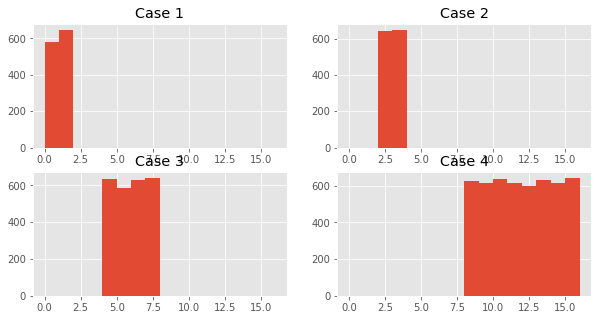

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
for i in range(1, 5):
    plt.subplot(2, 2, i)
    sim_results[sim_results.case == i].n_moves.hist(bins=range(0, 17))
    plt.title(f'Case {i}')

## Conclusion

I don't have a proof of whether this is the optimal strategy, but it does guarantee that you find a solution within a finite (15) number of moves. I am curious to see if there is a better way!